In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import pandas as pd


In [ ]:
# Exibe todos os datasets disponíveis
# tfds.list_builders()

In [ ]:
(img_train, label_train), (img_test, label_test) = tfds.as_numpy(tfds.load(
    name = 'kmnist',
    split=['train', 'test'],
    batch_size=-1,
    as_supervised=True,
))

In [ ]:
img_train = img_train.squeeze()
img_test = img_test.squeeze()

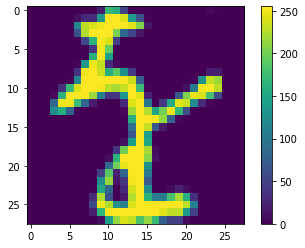

In [ ]:
plt.figure()
plt.imshow(img_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
img_train = img_train / 255.0

img_test = img_test / 255.0

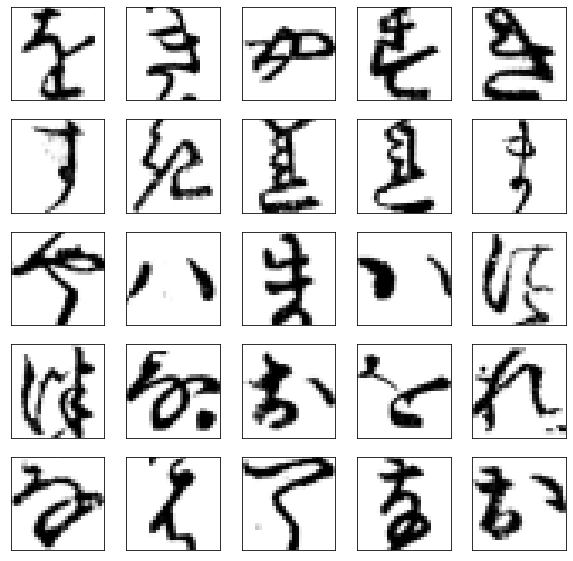

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img_train[i], cmap=plt.cm.binary)
plt.show()

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(img_train, label_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4079 - accuracy: 0.8778
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1971 - accuracy: 0.9419
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1396 - accuracy: 0.9581
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1042 - accuracy: 0.9692
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0792 - accuracy: 0.9761
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0634 - accuracy: 0.9808
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0492 - accuracy: 0.9855
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0402 - accuracy: 0.9877
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0312 - accuracy: 0.9908
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.027

In [ ]:
test_loss, test_acc = model.evaluate(img_test,  label_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.5109 - accuracy: 0.8946 - 412ms/epoch - 1ms/step

Test accuracy: 0.894599974155426
